In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
food_delivery = pd.read_csv('dados/dataset.csv', encoding = 'utf-8')

In [3]:
food_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260645 entries, 0 to 260644
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_transacao     260645 non-null  object 
 1   horario_pedido   260645 non-null  object 
 2   localidade       260645 non-null  int64  
 3   nome_item        260645 non-null  object 
 4   quantidade_item  260645 non-null  int64  
 5   latitude         260645 non-null  float64
 6   longitude        260645 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


In [4]:
food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [5]:
food_delivery['localidade'].value_counts()

6    37199
2    37180
7    33968
9    33877
4    33677
8    22028
3    21252
1    20961
5    20503
Name: localidade, dtype: int64

In [6]:
#Perguntas a serem respondidas para resolver os problemas de negócios da empresa que detém os dados:
#Qual a média de itens por pedido
#existe relação entre o horário do pedido e o item pedido
#existe relação entre o dia da semana pedido e o item pedido
#Qual a média da região onde é feito o maior numero de pedidos
#Qual a média da quantidade por cada tipo de alimento
#Qual a probabilidade de um cliente fazer um pedido com pizza e salada por exemplo
#Qual a probabilidade de um cliente pegar uma bebida em um final de semana por exemplo
#Quais os itens mais pedidos de acordo com periodos(horas) distintos do dia.
#Qual a localidade com mais pedidos.
#Analisar a relação entre os alimentos pedidos

In [7]:
food_delivery_pivot = food_delivery.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [8]:
food_delivery_pivot = food_delivery_pivot.fillna(0).reset_index()

In [9]:
food_delivery_pivot.head(5)

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0


In [10]:
food_delivery_pivot = food_delivery_pivot.merge(food_delivery[['id_transacao', 'localidade', 'horario_pedido']])

In [11]:
food_delivery_pivot.head()

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00
2,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00
3,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00
4,0x1000c8,4.0,4.0,1.0,5.0,9,2019-01-28 19:24:00


In [12]:
food_delivery_pivot.nunique()

id_transacao      100000
bebida                 6
pizza                  6
salada                 6
sobremesa              5
localidade             9
horario_pedido     76799
dtype: int64

In [13]:
food_delivery_pivot['horario_pedido'] = pd.to_datetime(food_delivery_pivot['horario_pedido'])

In [14]:
food_delivery_pivot['Mes'] = food_delivery_pivot['horario_pedido'].dt.month

In [15]:
food_delivery_pivot['Semana'] = food_delivery_pivot['horario_pedido'].dt.day_name()

In [16]:
food_delivery_pivot['Dia'] = food_delivery_pivot['horario_pedido'].dt.day

In [17]:
food_delivery_pivot['horario'] = food_delivery_pivot['horario_pedido'].dt.time

In [18]:
food_delivery_pivot

,id_transacao,bebida,pizza,salada,sobremesa,localidade,horario_pedido,Mes,Semana,Dia,horario
0,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,Tuesday,29,00:48:00
1,0x10000a,0.0,1.0,0.0,1.0,9,2019-01-29 00:48:00,1,Tuesday,29,00:48:00
2,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,Sunday,5,00:08:00
3,0x100058,0.0,2.0,0.0,2.0,6,2019-05-05 00:08:00,5,Sunday,5,00:08:00
4,0x1000c8,4.0,4.0,1.0,5.0,9,2019-01-28 19:24:00,1,Monday,28,19:24:00
...,...,...,...,...,...,...,...,...,...,...,...
260640,0xfff07,1.0,1.0,0.0,1.0,2,2019-05-04 00:48:00,5,Saturday,4,00:48:00
260641,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,Thursday,18,00:17:00
260642,0xfff4d,0.0,2.0,0.0,2.0,3,2019-07-18 00:17:00,7,Thursday,18,00:17:00
260643,0xfffb8,0.0,1.0,0.0,1.0,2,2019-11-07 00:05:00,11,Thursday,7,00:05:00


In [19]:
#Numero de pedidos para cada horário do dia.
pedidos_horario = food_delivery_pivot['horario'].value_counts()

In [20]:
pedidos_horario.head(20)

00:29:00    1157
00:33:00    1094
00:34:00    1074
00:27:00    1070
00:21:00    1063
00:25:00    1054
00:38:00    1036
00:26:00    1026
00:22:00    1018
00:23:00    1017
00:35:00    1010
00:24:00    1002
00:36:00     998
00:28:00     996
00:31:00     996
00:41:00     978
00:15:00     973
00:32:00     964
00:37:00     956
00:20:00     953
Name: horario, dtype: int64

In [21]:
#A maioria dos pedidos ocorrem entre o periodo de meia noite a 1 da manhâ, e entre 6 a 7 da tarde

In [22]:
#ANALISE BASEADA NOS DIAS E MESES DO ANO

In [23]:
#Numero de pedidos para cada mês do ano
mes_pedidos = food_delivery_pivot['Mes'].value_counts().reset_index()

In [24]:
mes_pedidos.columns = ['Mes', 'Contagem']

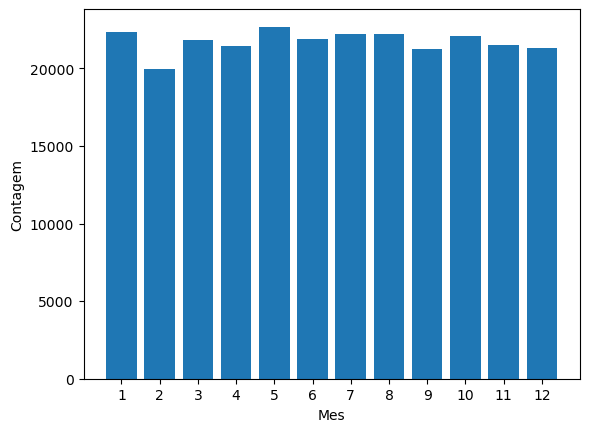

In [25]:
plt.bar(mes_pedidos['Mes'], mes_pedidos['Contagem'])
plt.xlabel('Mes')
plt.ylabel('Contagem')
plt.xticks(range(1, 13))
plt.show()

In [26]:
#Os dados seguem uma distribuição uniforme ou seja não existe uma grande diferença de pedidos para cada mês, o mes com o menor 
#número de pedidos é fevereiro e acredito que isso se deve ao fato de ter um menor número de dias.

In [27]:
#Número de pedidos para cada dia do mês
dia_pedidos = food_delivery_pivot['Dia'].value_counts().reset_index()

In [28]:
dia_pedidos.columns = ['Dia', 'Contagem']

<BarContainer object of 31 artists>

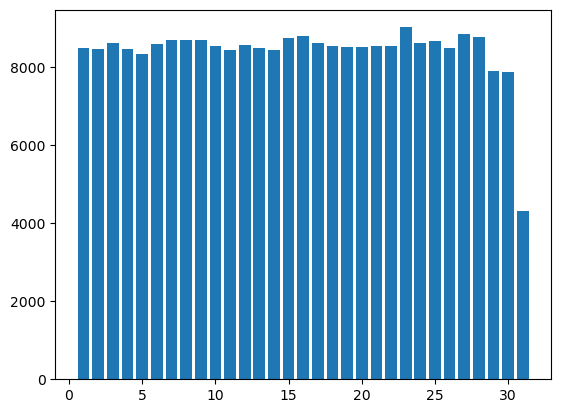

In [29]:
plt.bar(dia_pedidos['Dia'], dia_pedidos['Contagem'])

In [30]:
#O Número de pedidos por dia do mes também seguem uma distribuição uniforme, com excessão do dia 31 que deve estar ocorrendo
#por ter meses com apenas 30 dias

Text(0, 0.5, 'Total de Pedidos')

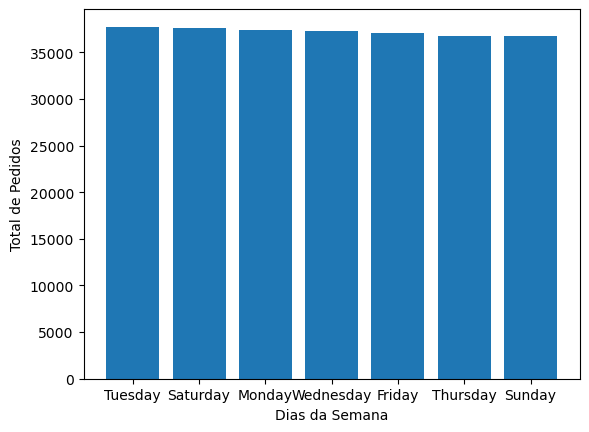

In [31]:
#Numero de pedidos por cada dia da semana(domingo a sábado)
semana_pedidos = food_delivery_pivot['Semana'].value_counts().reset_index()
semana_pedidos.columns = ['Semana', 'Total_Pedidos']
plt.bar(semana_pedidos['Semana'], semana_pedidos['Total_Pedidos'])
plt.xlabel('Dias da Semana')
plt.ylabel('Total de Pedidos')

In [32]:
#um leve numero maior de vendas na terça em relação ao domingo que tem o menor numero, mas no geral estão todos na mesma faixa.

<BarContainer object of 4 artists>

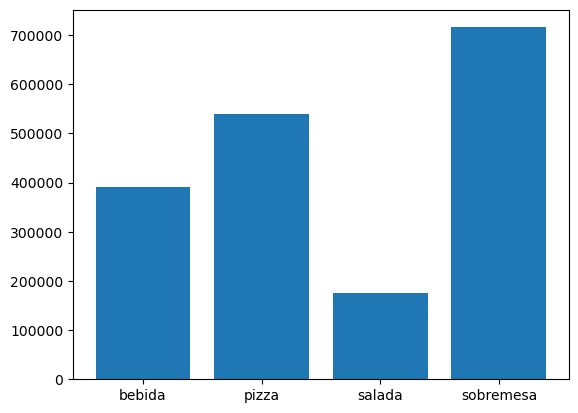

In [33]:
#Total de pedidos para cada item
tipo_alimento = ['bebida', 'pizza', 'salada', 'sobremesa']
total_PorPedido = np.sum(food_delivery_pivot[tipo_alimento])
plt.bar(tipo_alimento, total_PorPedido)

In [34]:
#Média da quantidade de cada alimento por pedido
M_Q_A_P = np.mean(food_delivery_pivot.iloc[:, 1:5])
M_Q_A_P

bebida       1.498187
pizza        2.071331
salada       0.674910
sobremesa    2.746241
dtype: float64

In [35]:
#ANALISE COM BASE NO HORÁRIO DO PEDIDO

In [36]:
#Criar um novo dataframe apenas com os itens pedidos e quantidades junto com  o horário, para analisar a relação entre os 
#alimentos pedidos em determinados períodos diferentes.
colunas_analisar = ['bebida', 'pizza', 'salada', 'sobremesa', 'horario']
df_colunas = food_delivery_pivot[colunas_analisar]

In [37]:
df_ment = pd.melt(df_colunas, id_vars = ['horario'], var_name = ['item'], value_name = 'quantidade')

In [38]:
df_ment.head()

,horario,item,quantidade
0,00:48:00,bebida,0.0
1,00:48:00,bebida,0.0
2,00:08:00,bebida,0.0
3,00:08:00,bebida,0.0
4,19:24:00,bebida,4.0


In [39]:
from datetime import time
df_ment['horario'] = pd.to_datetime(df_ment['horario'], format = '%H:%M:%S').dt.time

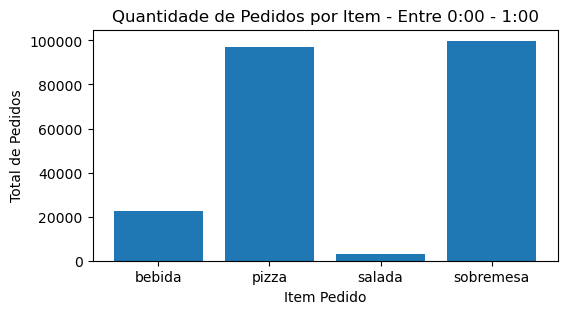

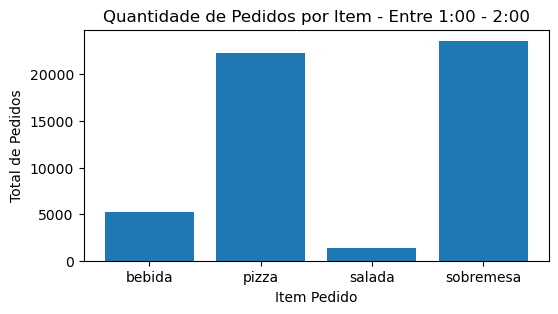

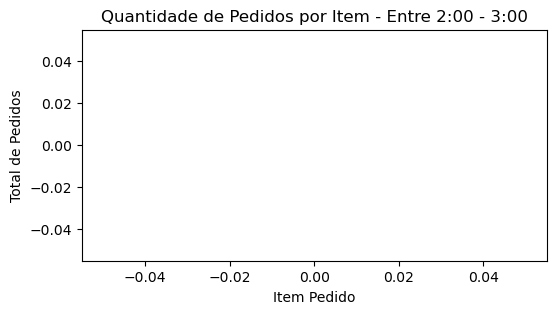

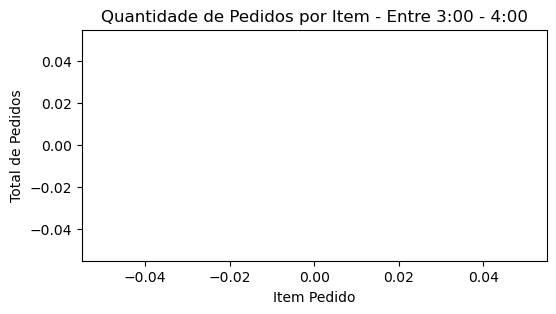

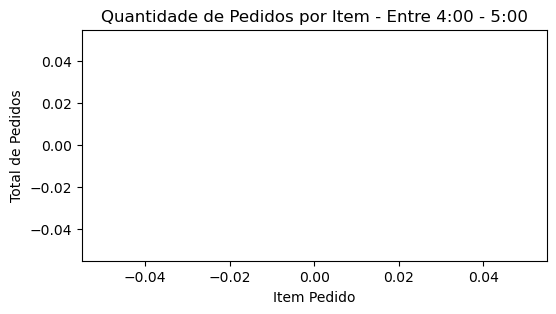

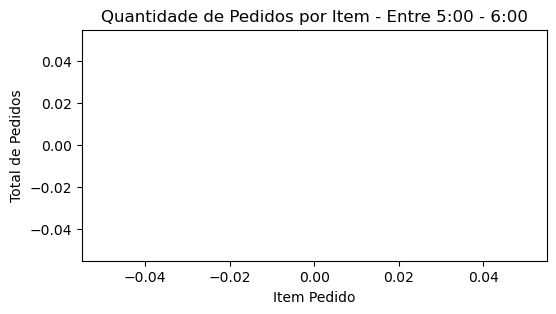

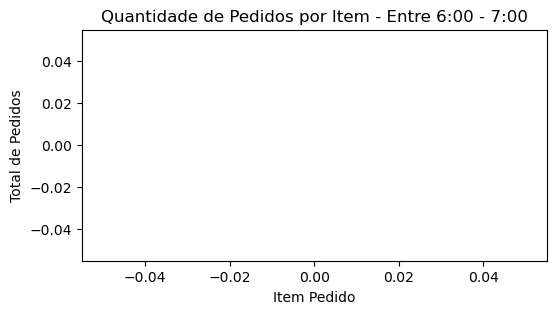

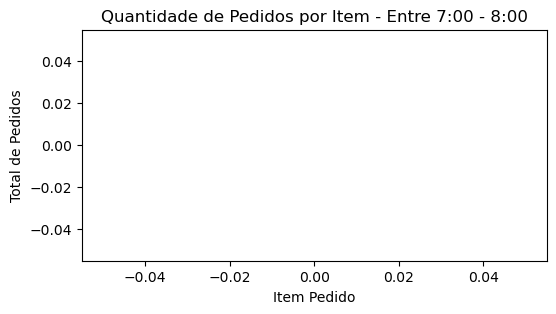

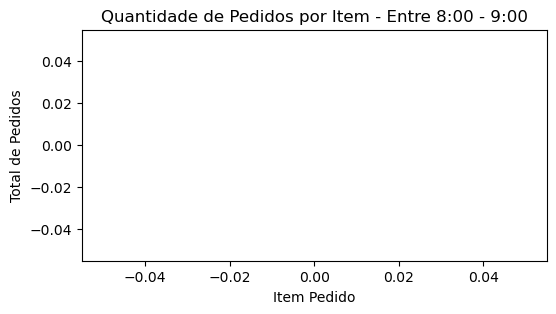

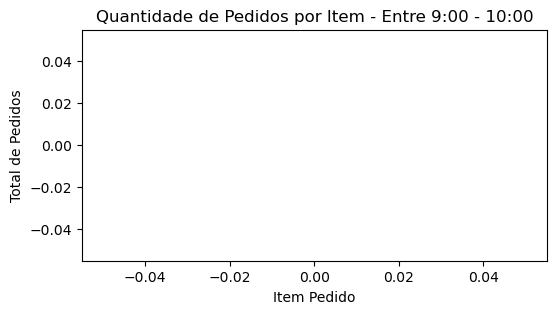

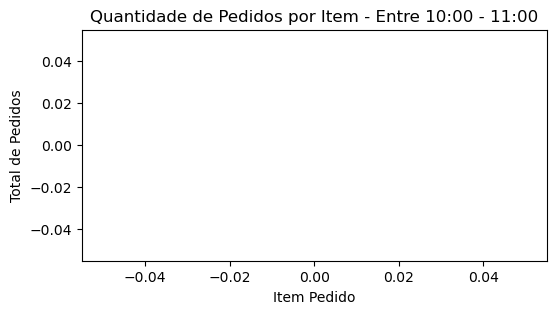

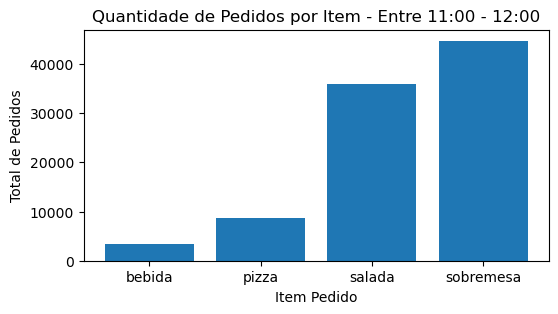

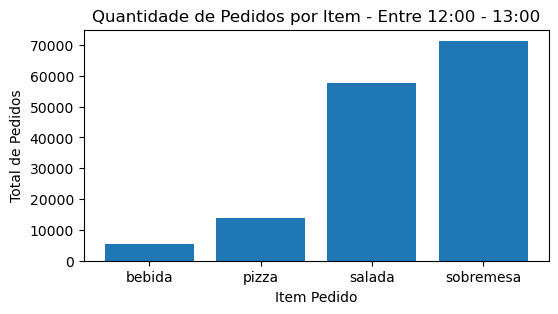

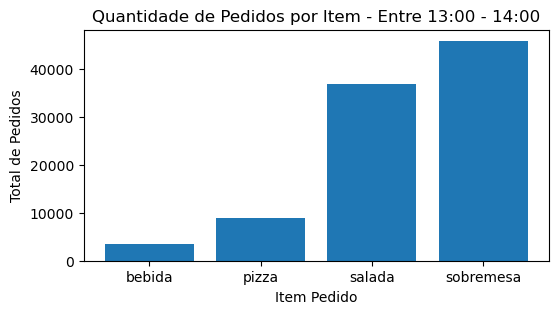

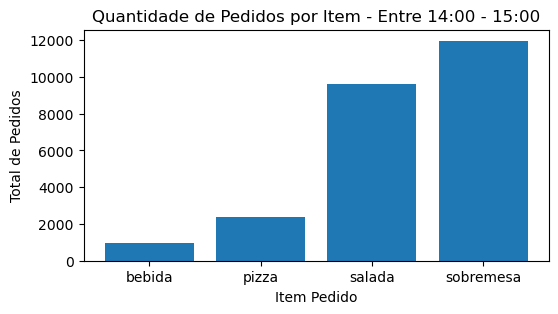

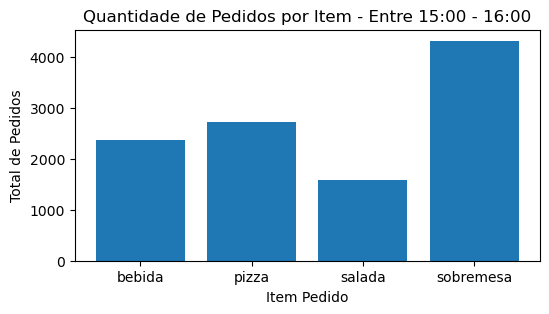

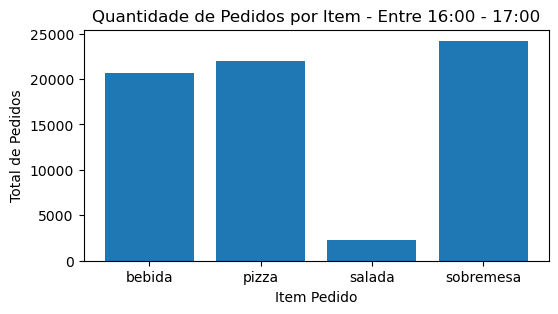

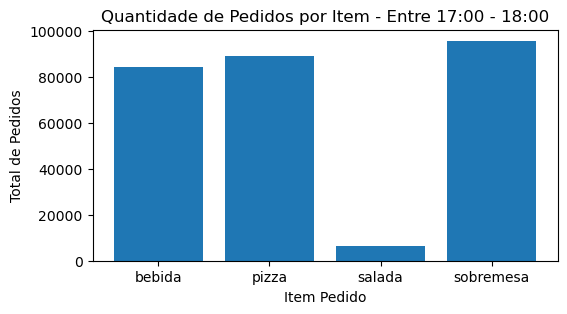

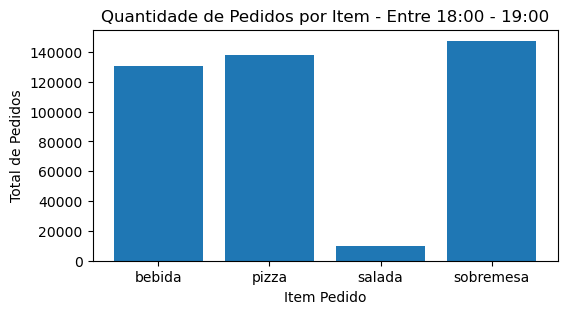

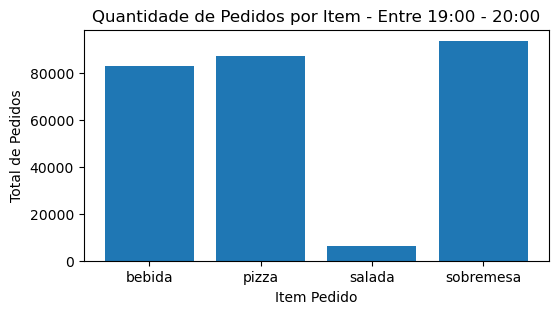

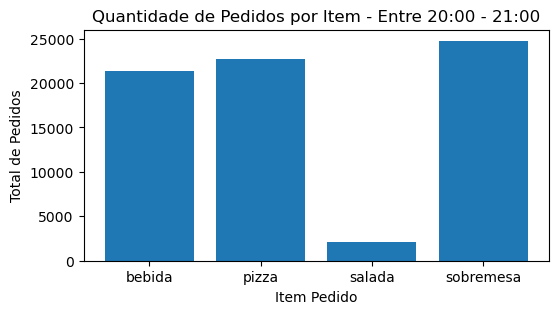

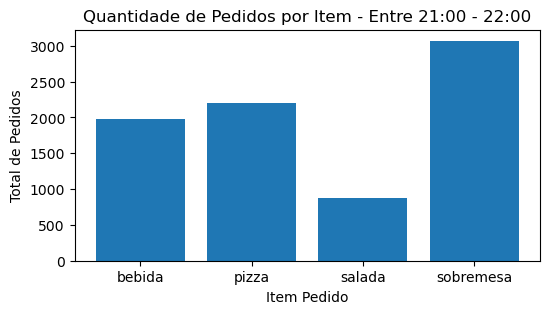

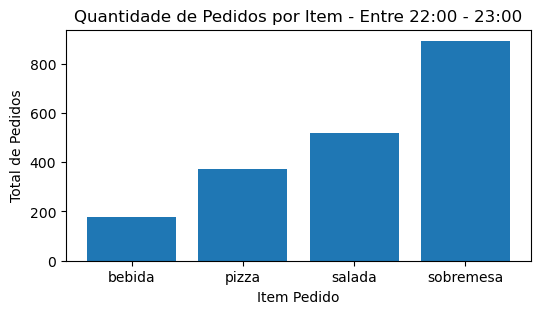

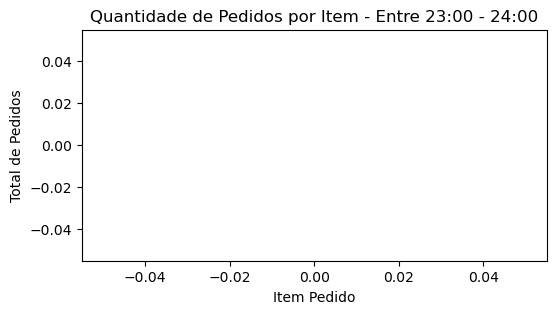

In [40]:
#Quantidade de pedidos por item para periodos do dia de uma em uma hora entre as 24 horas totais visualizadas de forma gráfica
for i in range(24):
    
    inicio = time(i, 0, 0)
    if i == 23:
        fim = time(0, 0, 0)
    else:    
        fim = time(i +1, 0, 0)
    
    df_intervalo = df_ment[(df_ment['horario'] >= inicio) & (df_ment['horario'] < fim)]
    
    Npedidos_item = df_intervalo.groupby('item')['quantidade'].sum()
    
    fig, ax = plt.subplots(figsize = (6, 3)) 
    
    ax.bar(Npedidos_item.index, Npedidos_item.values)
    ax.set_xlabel('Item Pedido')
    ax.set_ylabel('Total de Pedidos')
    ax.set_title(f'Quantidade de Pedidos por Item - Entre {i}:00 - {i+1}:00')
    plt.show()

In [41]:
#Em todos os períodos analisados sobremesa é o que detém o maior número de pedidos com o pico entre 18 a 19 hrs
#O segundo maior é pizza, mas das 11 da manhã as 15 da tarde salada é o segundo mais vendido tendo seu maior pico de vendas entre
# meio dia e uma da tarde ou seja no perido de almoço as pessoas costumam pedir bastante salada
#já bebidas tem seu maior número de pedidos entre 16 e 21 hrs com o pico entre 18 e 19hrs
#No geral o maior número de pedidos fica entre os periodos de 17 as 20 hrs com excessão da salada que está entre 11 a 14 hrs
#e da meia noite a uma da manhã possui um número alto de pedidos de sobremesa e pizza.

In [42]:
#ANALISE COM FOCO NA LOCALIDADE

In [43]:
quant_categ = food_delivery_pivot['localidade'].value_counts()


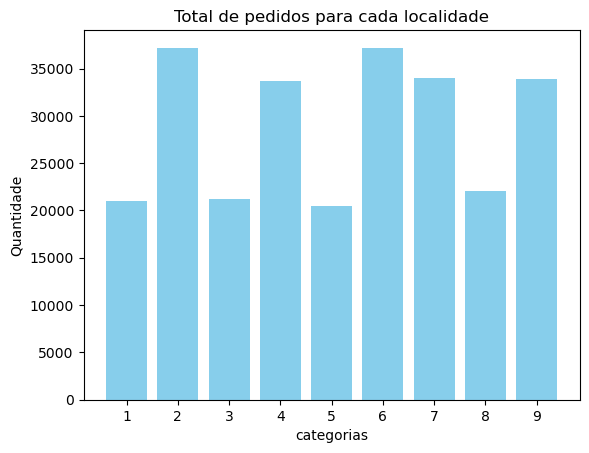

In [44]:
plt.bar(quant_categ.index, quant_categ.values, color = 'skyblue')
plt.xticks(range(1, 10))
plt.xlabel('categorias')
plt.ylabel('Quantidade')
plt.title('Total de pedidos para cada localidade')
plt.show()

In [45]:
#Localidades 2 e 6 detém o maior número de pedido.
#Localidade 5 detém o menor.

In [46]:
total_alimentos_loc = food_delivery_pivot.groupby('pizza')['localidade']

<Axes: xlabel='localidade', ylabel='count'>

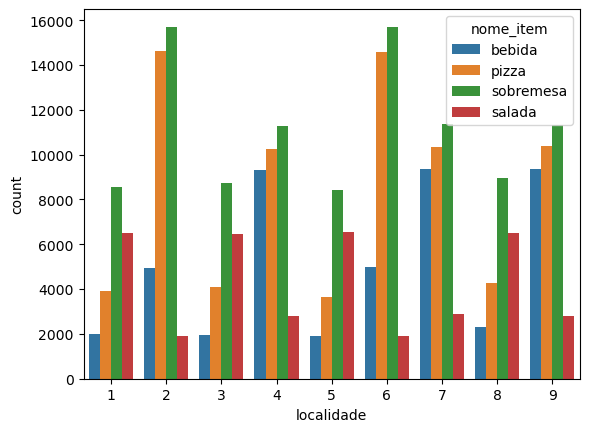

In [47]:
#Gráfico mostrando o total de cada tipo de alimento em cada localidade para ver se alguma localidade costuma pedir mais de um 
#tipo de alimento do que outra.
sns.countplot(data = food_delivery, x = 'localidade', hue = 'nome_item')

In [48]:
#As localidade seguem com a mesma proporção de itens pedidos, é claro que cada uma com seu respectivo total de pedidos que os diferem.

In [49]:
#PRE-PROCESSAMENTO DOS DADOS

In [50]:
#Exclusão da coluna id
food_delivery_pivot = food_delivery_pivot.drop('id_transacao', axis = 1)

In [51]:
#exclusão da variável horario pedido, pois como foi feito a divisão das informações dessa variável irei usas elas.
food_delivery_pivot = food_delivery_pivot.drop('horario_pedido', axis = 1)

In [52]:
food_delivery_pivot.head(2)

,bebida,pizza,salada,sobremesa,localidade,Mes,Semana,Dia,horario
0,0.0,1.0,0.0,1.0,9,1,Tuesday,29,00:48:00
1,0.0,1.0,0.0,1.0,9,1,Tuesday,29,00:48:00


In [53]:
#Para essa versão irei excluir as variáveis dia, semana e mes por não terem apresentado diferença nos pedidos, para uma nova versão 
#irei analisar mais profundamente essas colunas para ver se a quantidade de cada item por exemplo, não muda em meses dias e semanas
#diferentes.
food_delivery_pivotv3 = food_delivery_pivot.drop(['Mes', 'Semana', 'Dia'], axis = 1)
food_delivery_pivotv3.head()

,bebida,pizza,salada,sobremesa,localidade,horario
0,0.0,1.0,0.0,1.0,9,00:48:00
1,0.0,1.0,0.0,1.0,9,00:48:00
2,0.0,2.0,0.0,2.0,6,00:08:00
3,0.0,2.0,0.0,2.0,6,00:08:00
4,4.0,4.0,1.0,5.0,9,19:24:00


In [54]:
#Converter a variável hora em minutos e gravar em uma nova coluna para atiliza-lá no algoritmo k-means
food_delivery_pivotv3['hora_segundos'] = food_delivery_pivotv3['horario'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [55]:
food_delivery_pivotv3 = food_delivery_pivotv3.drop('horario', axis = 1)
food_delivery_pivotv3.head()

,bebida,pizza,salada,sobremesa,localidade,hora_segundos
0,0.0,1.0,0.0,1.0,9,2880
1,0.0,1.0,0.0,1.0,9,2880
2,0.0,2.0,0.0,2.0,6,480
3,0.0,2.0,0.0,2.0,6,480
4,4.0,4.0,1.0,5.0,9,69840


In [56]:
#Normalização dos dados usando StandardScaler
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(food_delivery_pivotv3)
food_delivery_pivotv4 = pd.DataFrame(dados_normalizados, columns = food_delivery_pivotv3.columns)
food_delivery_pivotv4.head()

,bebida,pizza,salada,sobremesa,localidade,hora_segundos
0,-0.900587,-0.676024,-0.650197,-1.302087,1.514630,-1.561356
1,-0.900587,-0.676024,-0.650197,-1.302087,1.514630,-1.561356
2,-0.900587,-0.045011,-0.650197,-0.556436,0.339009,-1.649611
3,-0.900587,-0.045011,-0.650197,-0.556436,0.339009,-1.649611
4,1.503884,1.217017,0.313186,1.680519,1.514630,0.900952


In [58]:
#Criação do modelo não supervisonado para divisão dos perfis 
#Algoritmo K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
#Definir qual o melhor número de grupos(k) de acordo com a métrica Silhueta
#Irei criar 9 modelos um com cada número no range de 2 a 9 para avaliar a pontuação da silhueta para cada modelo
silhueta_score = []

for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    
    labels = kmeans.fit_predict(food_delivery_pivotv4)
    score = silhouette_score(food_delivery_pivotv4, labels)
    silhueta_score.append(score)

  File "C:\Users\grego\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


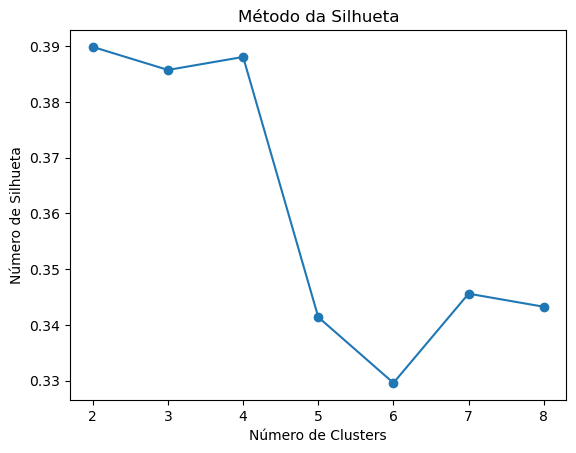

In [60]:
plt.plot(range(2, 9), silhueta_score, marker = 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('Número de Silhueta')
plt.title('Método da Silhueta')
plt.show()

In [61]:
#De acordo com o gráfico os melhores valores de K usando essa métrica foi 2 e 4, irei usar outro método de avaliação 
#para ver se os valores permanecem os mesmos

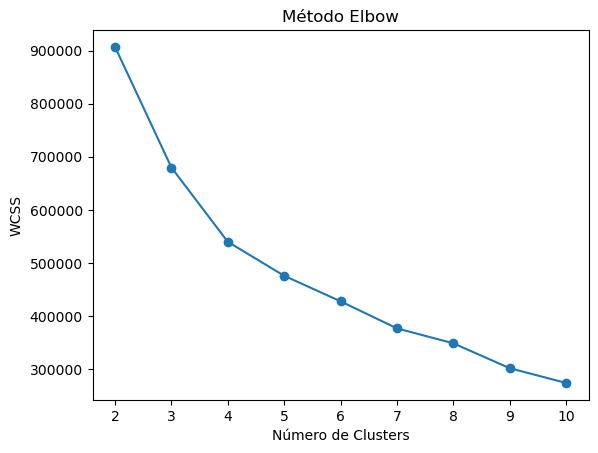

In [62]:
#Escolhendo o melhor valor de K com o método ELbow
#inertia é a soma das distâncias das amostras para o seu centro de agrupamento mais próximo, logo quanto menor melhor
soma_valores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(food_delivery_pivotv4)
    soma_valores.append(kmeans.inertia_)

plt.plot(range(2, 11), soma_valores, marker = 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método Elbow')
plt.show()

In [63]:
#interpretando o gráfico vejo que a medida que aumenta o número de k diminui a distancia, mais como usando o outro método a 
#performance dos valores mais altos de k foram ruins, irei usar k = 4 que teve uma boa performance nos dois métodos avaliados.
#também o valor de k foi o ponto do cotovelo logo é o valor ideal para não aumentar o número de clusters de forma desnecessária
#assim impedindo que ocorra overfitting ao modelo

In [64]:
#Criação do modelo
modelo_kmeans = KMeans(n_clusters = 4, random_state = 0)
rotulos_clusters = modelo_kmeans.fit_predict(food_delivery_pivotv4)

In [65]:
#Criação de uma nova coluna aplicando os rótulos para cada linha 
food_delivery_pivotv4['Clusters'] = rotulos_clusters

In [66]:
food_delivery_pivotv4.head(10)

,bebida,pizza,salada,sobremesa,localidade,hora_segundos,Clusters
0,-0.900587,-0.676024,-0.650197,-1.302087,1.514630,-1.561356,2
1,-0.900587,-0.676024,-0.650197,-1.302087,1.514630,-1.561356,2
2,-0.900587,-0.045011,-0.650197,-0.556436,0.339009,-1.649611,2
3,-0.900587,-0.045011,-0.650197,-0.556436,0.339009,-1.649611,2
4,1.503884,1.217017,0.313186,1.680519,1.514630,0.900952,0
5,1.503884,1.217017,0.313186,1.680519,1.514630,0.900952,0
6,1.503884,1.217017,0.313186,1.680519,1.514630,0.900952,0
7,1.503884,1.217017,0.313186,1.680519,1.514630,0.900952,0
8,-0.900587,-0.676024,-0.650197,-1.302087,0.339009,-1.634166,2
9,-0.900587,-0.676024,-0.650197,-1.302087,0.339009,-1.634166,2


In [67]:
#Visualizando a tabela com os dados no formato original
food_delivery_pivotv3['Clusters'] = rotulos_clusters

In [68]:
food_delivery_pivotv3.head(10)

,bebida,pizza,salada,sobremesa,localidade,hora_segundos,Clusters
0,0.0,1.0,0.0,1.0,9,2880,2
1,0.0,1.0,0.0,1.0,9,2880,2
2,0.0,2.0,0.0,2.0,6,480,2
3,0.0,2.0,0.0,2.0,6,480,2
4,4.0,4.0,1.0,5.0,9,69840,0
5,4.0,4.0,1.0,5.0,9,69840,0
6,4.0,4.0,1.0,5.0,9,69840,0
7,4.0,4.0,1.0,5.0,9,69840,0
8,0.0,1.0,0.0,1.0,6,900,2
9,0.0,1.0,0.0,1.0,6,900,2


In [ ]:
#Calcular o silhueta score para avaliar o quão bem os clusters estão definidos
silhouette_score(food_delivery_pivotv4, rotulos_clusters)

In [ ]:
#Meu modelo atingiu um score de 0.47

In [69]:
#ANALISE DESCRITIVA DOS CLUSTERS PARA CADA VARIÁVEL DO dataset
pd.set_option('display.max_columns', None)
estatisticas_clusters = food_delivery_pivotv3.groupby('Clusters').describe()
estatisticas_clusters

bebida                                                 pizza  \
            count      mean       std  min  25%  50%  75%  max    count   
Clusters                                                                  
0         90830.0  3.522680  0.946933  0.0  3.0  4.0  4.0  5.0  90830.0   
1         47889.0  0.179916  0.424412  0.0  0.0  0.0  0.0  2.0  47889.0   
2         62405.0  0.379489  0.541481  0.0  0.0  0.0  1.0  3.0  62405.0   
3         59521.0  0.642328  0.775144  0.0  0.0  0.0  1.0  2.0  59521.0   

                                                        salada            \
              mean       std  min  25%  50%  75%  max    count      mean   
Clusters                                                                   
0         3.863690  0.734410  2.0  3.0  4.0  4.0  5.0  90830.0  0.202543   
1         0.416025  0.585287  0.0  0.0  0.0  1.0  3.0  47889.0  2.572678   
2         1.708565  0.967028  0.0  1.0  1.0  2.0  5.0  62405.0  0.047224   
3         1.048319  0.791897  0.0  0.0  1.0  2.0  3.0  59521.0  0.526957   

                                            sobremesa                      \
               std  min  25%  50%  75%  max     count      mean       std   
Clusters                                                                    
0         0.421055  0.0  0.0  0.0  0.0  2.0   90830.0  4.066234  0.684343   
1         0.770874  1.0  2.0  2.0  3.0  5.0   47889.0  2.988703  0.891650   
2         0.212119  0.0  0.0  0.0  0.0  1.0   62405.0  1.755789  0.974518   
3         0.499277  0.0  0.0  1.0  1.0  1.0   59521.0  1.575276  0.648185   

                                  localidade                                \
          min  25%  50%  75%  max      count      mean       std  min  25%   
Clusters                                                                     
0         3.0  4.0  4.0  5.0  5.0    90830.0  6.201894  2.339017  1.0  4.0   
1         2.0  2.0  3.0  3.0  5.0    47889.0  4.557873  2.611920  1.0  3.0   
2         1.0  1.0  2.0  2.0  5.0    62405.0  4.217595  2.224631  1.0  2.0   
3         1.0  1.0  1.0  2.0  4.0    59521.0  4.932679  2.561525  1.0  3.0   

                        hora_segundos                                       \
          50%  75%  max         count          mean           std      min   
Clusters                                                                     
0         7.0  9.0  9.0       90830.0  65086.349884  11470.088128      0.0   
1         5.0  7.0  9.0       47889.0  46443.439203   7864.504842    240.0   
2         4.0  6.0  9.0       62405.0   2280.379777   1482.580940      0.0   
3         5.0  7.0  9.0       59521.0  59462.805396  15687.802984  39600.0   

                                              
              25%      50%      75%      max  
Clusters                                      
0         63900.0  66480.0  69120.0  86340.0  
1         43200.0  45540.0  48240.0  86340.0  
2          1140.0   2100.0   3240.0  44220.0  
3         45360.0  55200.0  69540.0  86340.0

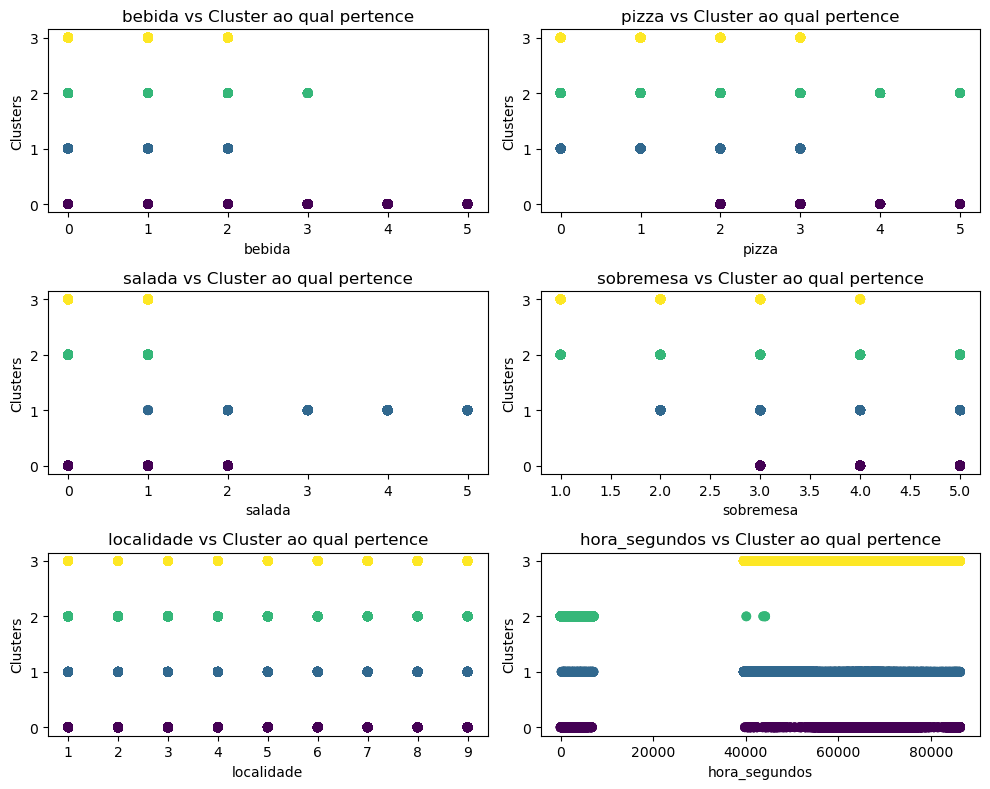

In [146]:
#Criação de scatterplots relacionando cada variável com a variavel cluster que foi adicionada ao dataset após a criação do modelo
variaveis_df = ['bebida', 'pizza', 'salada', 'sobremesa', 'localidade', 'hora_segundos']

def scatter_plots(df, x, y, ax):
    ax.scatter(df[x], df[y], c=df['Clusters'], cmap='viridis')
    ax.set_title(f'{x} vs Cluster ao qual pertence')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Calcula quantas linhas e colunas de subplots serão necessárias
num_rows = len(variaveis_df) // 2
if len(variaveis_df) % 2 != 0:
    num_rows += 1

# Cria os subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 8))

# Iterar sobre pares de variáveis
for i, coluna in enumerate(variaveis_df):
    row = i // 2
    col = i % 2
    if num_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]
    scatter_plots(food_delivery_pivotv3, coluna, 'Clusters', ax)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [ ]:
#Grupo 0 - Possui pedidos de 0 a 5 em bebidas, 2 a 5 em pizza, 0 a 2 em salada e 3 a 5 em sobremesas por pedido
#Grupo 1 - Possui pedidos de 0 a 2 em bebidas, 0 a 3 em pizza, 1 a 5 em salada e 2 a 5 em sobremesa por pedido
#Grupo 2 - Possui pedidos de 0 a 3 em bebidas, 0 a 5 em pizza, 0 e 1 em salada e 0 a 5 em sobremesa por pedido
#Grupo 3 - Possui pedidos de 0 a 2 em bebidas, 0 a 3 em pizza, 0 a 1 em salada e 0 a 4 em sobremesa por pedido
#em relação as horas apenas o grupo 2 apresenta uma diferença significativa apresentando pedidos apenas no inicio do dia
#localidade não apresentou impacto na criação dos clusters.